# Business Problem 1 - Netflix EDA

Analyze the data and generate insights that could help Netflix decide which type of shows/movies to produce and how to grow the business.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Fundamental Analysis Items/Questions

- Statistical analysis
    - head
    - info
    - describe
    - distributions
- Data types - What is available and what can be changed?
- Missing data - How to handle them?
- Can we create new dimensions? - by breaking the existing ones or combining them?
- Identifying possible relationships in the given data
    - What movies are released at what time?
    - What director releases what kind of movie?
    - Which country likes what genre/director
    - Is there a relationship between duration and release year/rating
    - Trends - date vs director/title/type/country

In [2]:
df = pd.read_csv("d:ScalerData/netflix.csv")

In [3]:
df.shape

(8807, 12)

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s2538,Movie,Siren,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


<H3>Insights, action items and questions based on statistical analysis:</H3>

1. Data is missing for: director, cast, country, date_added, rating, duration<br>
    Q - How can we handle this data? - To be explored<br><br>
2. Except release_year, all the other values are object type.<br>
   We can convert the following:
   - "date_added" to datetime
   - "duration" into mins/seasons for movies vs shows - need to test this hypothesis
   - "listed_in" column looks like genre. This can be split or pivoted - To be explored
   <br><br>
3. Could there be more than one directors?
4. There are more than one cast members. Split this to find how many unique cast members are there.
5. Why is "unique" for "release_year" marked as NaN?\
    Ans - For numerical columns, describe() does not calculate unique counts.
6. Total countries in the world are only around 200. Why does it show ~750?
7. Some movies/shows don't have directors. It would be interesting to look into those.
8. What is the range of date_added?
9. What is the range of release_date?
10. What can we do about description? - Google what can we usually do with this.

## Data Cleaning

### Handling Missing Data

Let us see how much data is missing for columns

In [7]:
def print_missing_values(df):
    print("No and % of missing values\n")
    for i in df.columns:
        total_count = df.shape[0]
        null_count = df[i].isna().sum()
        perc_null = np.round(100*null_count/total_count, 2)
        if perc_null > 0:
            print(f"{i:15s} {null_count:5d} {perc_null:7.2f} %")

In [8]:
print_missing_values(df)

No and % of missing values

director         2634   29.91 %
cast              825    9.37 %
country           831    9.44 %
date_added         10    0.11 %
rating              4    0.05 %
duration            3    0.03 %


- **"director"** field has a lot of missing data.
    - Can we delete the rows? 
        - No - a very significant amount will be discarded
    - Can we delete the column itself?
        - Maybe yes. Since almost one third of the data is missing, maybe we can. But keeping it also does not hurt. We might not want to use it for deriving correlations.
    - Any other statistical imputation?
        - No. Data is categorical and missing count is huge - adding a mode can skew it badly
    - Create a new category?
        - **YES** - This could actually indicate some relationship. Let us mark these **null directors as "Anonymous"**
- For **"cast" and "country"** it does not seem logical to delete almost 10% of the data from each cols. We might be losing out on important records. Just like "director", let us create new categories, **replacing nulls with "NA"**.
- For **"date_added", "rating" and "duration"**, the percentage is very low.
    - Should we use imputation using mode or just remove the records?
        <br>Losing data might not be advantageous. Let us keep the data and **impute with mode** for each of the columns.
        

In [9]:
# Handling NaN for "director" - Replace with "Anonymous"

df["director"].fillna("Anonymous", inplace=True)

anon_director = sum(df["director"] == "Anonymous")
print("Anonymous directors:", anon_director)

Anonymous directors: 2634


In [10]:
# Handling NaN for "cast" and "country"

df["cast"].fillna("NA", inplace=True)
df["country"].fillna("NA", inplace=True)

cast_NA = sum(df["cast"] == "NA")
country_NA = sum(df["country"] == "NA")

print(f"NA cast: {cast_NA} \nNA country: {country_NA}")

NA cast: 825 
NA country: 831


In [11]:
# For "date_added", "rating" and "duration" imputation, we will have to convert the types first

df["date_added"] = pd.to_datetime(df["date_added"])

In [12]:
df.loc[df["date_added"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Anonymous,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Anonymous,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Anonymous,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Anonymous,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Anonymous,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Anonymous,Igor Dmitriev,NA,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Anonymous,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Anonymous,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Anonymous,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Anonymous,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [13]:
df["date_added"].value_counts()

2020-01-01    110
2019-11-01     91
2018-03-01     75
2019-12-31     74
2018-10-01     71
             ... 
2015-06-26      1
2018-11-28      1
2009-05-05      1
2017-10-10      1
2015-01-23      1
Name: date_added, Length: 1714, dtype: int64

Notice that the mode is 1st day of 2020 and the date_created for all the missing values were before 2020. Hence, we can safely impute with mode

In [14]:
mode_date_added = df["date_added"].value_counts().keys()[0]

In [15]:
df["date_added"].fillna(mode_date_added, inplace=True)

In [16]:
df["date_added"].value_counts()

2020-01-01    120
2019-11-01     91
2018-03-01     75
2019-12-31     74
2018-10-01     71
             ... 
2015-06-26      1
2018-11-28      1
2009-05-05      1
2017-10-10      1
2015-01-23      1
Name: date_added, Length: 1714, dtype: int64

In [17]:
# Looking at ratings for missing values

df.loc[df["rating"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,Anonymous,"Oprah Winfrey, Ava DuVernay",NA,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,Anonymous,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,Anonymous,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [18]:
df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
66 min         1
84 min         1
Name: rating, dtype: int64

On looking at the unique counts, first thing we notice is that the last 3 values don't look like ratings but duration instead. \
We will come back to this.\
But first, let us try to see what the ratings mean so that we can impute values as correct as possible. (Obtained from Netflix official page)

Kids: \
TV-Y: Designed to be appropriate for all children\
TV-Y7: Suitable for ages 7 and up\
\
G: Suitable for General Audiences\
TV-G: Suitable for General Audiences\
PG: Parental Guidance suggested\
TV-PG: Parental Guidance suggested\
\
Teens: \
PG-13: Parents strongly cautioned. May be Inappropriate for ages 12 and under.\
TV-14: Parents strongly cautioned. May not be suitable for ages 14 and under.\
\
Adults: \
R: Restricted. May be inappropriate for ages 17 and under.\
TV-MA: For Mature Audiences. May not be suitable for ages 17 and under.\
NC-17: Inappropriate for ages 17 and under\


It looks like except show **s7313**, the other 3 shows can be marked as TV-MA and **s7313** can be marked as TV-Y7 (based on "listed_in" columns)

However, an ideal way to do this imputation should have been using a model.

In [19]:
df.loc[df["show_id"] == "s7313", "rating"] = "TV-Y7"

In [20]:
df.loc[df["show_id"] == "s7313"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7312,s7313,TV Show,Little Lunch,Anonymous,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,TV-Y7,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."


In [21]:
mode_rating = df["rating"].value_counts().keys()[0]

In [22]:
df["rating"].fillna(mode_rating, inplace=True)

In [23]:
# Missing values for duration
df.loc[df["duration"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


Strangely, the rating has been replaced with duration. Let us move rating to duration and impute rating with mode_rating.\
Since it is only 3 records, we can do the replacements manually. Else, we could do this based on patterns.

In [24]:
df.loc[df["show_id"].isin(["s5542", "s5795", "s5814"]), "duration"] = \
df.loc[df["show_id"].isin(["s5542", "s5795", "s5814"]), "rating"]

In [25]:
df.loc[df["show_id"].isin(["s5542", "s5795", "s5814"])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [26]:
df.loc[df["show_id"].isin(["s5542", "s5795", "s5814"]), "rating"] = mode_rating

In [27]:
df.loc[df["show_id"].isin(["s5542", "s5795", "s5814"])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,TV-MA,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,TV-MA,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,TV-MA,66 min,Movies,The comic puts his trademark hilarious/thought...


In [28]:
print_missing_values(df)

No and % of missing values



**All missing values have been handled!**

### Understanding the features and applying transformations

Let us look into the available data again and try to understand if we can create new features or split some.

In [29]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Anonymous,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NA,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Anonymous,NA,NA,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Anonymous,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


We can perform the following transformations on the data:

- Convert duration into numerical seasons/mins based on TV Show/Movie
- Understand the country distribution since the unique counts were quite strange ~750
- Split cast into multiple rows
- Split listed_in into multiple rows

**Q: Is it true that all series are in Seasons and all movies in mins?**

In [30]:
df["duration_amt"] = df["duration"].apply(lambda x: x.split(" ")[0])
df["duration_metric"] = df["duration"].apply(lambda x: x.split(" ")[1])

In [31]:
df.groupby(["type", "duration_metric"])["type"].count()

type     duration_metric
Movie    min                6131
TV Show  Season             1793
         Seasons             883
Name: type, dtype: int64

**Ans: Yes. Actually TV shows have either "Season" or "Seasons". And it seems 2/3 of the TV Shows have only 1 season.**

We can use this fact to understand the population of TV Shows and Movies separately.

In [32]:
df["duration_amt"] = df["duration_amt"].astype("int")

In [33]:
df["duration_amt"]

0        90
1         2
2         1
3         1
4         2
       ... 
8802    158
8803      2
8804     88
8805     88
8806    111
Name: duration_amt, Length: 8807, dtype: int32

**Let us understand the field "country"**

In [34]:
df["country"].value_counts()

United States                                       2818
India                                                972
NA                                                   831
United Kingdom                                       419
Japan                                                245
                                                    ... 
Argentina, France, United States, Germany, Qatar       1
United States, Denmark                                 1
United Kingdom, France, United States, Belgium         1
United States, Australia, China                        1
Germany, Sri Lanka                                     1
Name: country, Length: 749, dtype: int64

**Observation:** There are clearly more than one values for the country field. But the definition of country is as follows:\
Country: Country where the movie/show was produced. 

Is it possible that a show be produced in more than one country? 
- Maybe. **Need to confirm with the business whether it is the country produced or country released?**

In any case, we might want to split the field into multiple rows.

**Let us now created an exploded data set where we have one row each for country,  cast and genre**

In [35]:
df_exploded = df.copy()

In [36]:
df_exploded["director_series"] = df_exploded["director"].apply(lambda x: x.strip().split(","))

In [37]:
df_exploded["country_series"] = df_exploded["country"].apply(lambda x: x.strip().split(","))

In [38]:
df_exploded["cast_series"] = df_exploded["cast"].apply(lambda x: x.strip().split(","))

In [39]:
df_exploded["listed_in_series"] = df_exploded["listed_in"].apply(lambda x: x.strip().split(","))

In [40]:
df_exploded = df_exploded.explode("director_series")
df_exploded["director_series"] = df_exploded["director_series"].apply(lambda x: x.strip())

In [41]:
df_exploded = df_exploded.explode("country_series")
df_exploded["country_series"] = df_exploded["country_series"].apply(lambda x: x.strip())

In [42]:
df_exploded = df_exploded.explode("cast_series")
df_exploded["cast_series"] = df_exploded["cast_series"].apply(lambda x: x.strip())

In [43]:
df_exploded = df_exploded.explode("listed_in_series")
df_exploded["listed_in_series"] = df_exploded["listed_in_series"].apply(lambda x: x.strip())

In [44]:
df_exploded.shape

(202065, 18)

In [45]:
df_exploded["country_series"].value_counts().sort_index()

                106
Afghanistan       2
Albania           8
Algeria          77
Angola           32
               ... 
Vatican City      3
Venezuela        28
Vietnam         134
West Germany     91
Zimbabwe         42
Name: country_series, Length: 124, dtype: int64

There are 106 values that were created with country as blank.

Possible issue 
- some country names had spaces
- fields had commas before or after a country.

In [46]:
df.loc[df["country"] == ""]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_amt,duration_metric


In [47]:
df.loc[df["country"] == " "]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_amt,duration_metric


No blank data present in the original df.

Let's check for the exploded view.

In [48]:
df_exploded.loc[df_exploded["country_series"] == ""]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_amt,duration_metric,director_series,country_series,cast_series,listed_in_series
193,s194,TV Show,D.P.,Anonymous,"Jung Hae-in, Koo Kyo-hwan, Kim Sung-kyun, Son ...",", South Korea",2021-08-27,2021,TV-MA,1 Season,"International TV Shows, TV Dramas",A young private’s assignment to capture army d...,1,Season,Anonymous,,Jung Hae-in,International TV Shows
193,s194,TV Show,D.P.,Anonymous,"Jung Hae-in, Koo Kyo-hwan, Kim Sung-kyun, Son ...",", South Korea",2021-08-27,2021,TV-MA,1 Season,"International TV Shows, TV Dramas",A young private’s assignment to capture army d...,1,Season,Anonymous,,Jung Hae-in,TV Dramas
193,s194,TV Show,D.P.,Anonymous,"Jung Hae-in, Koo Kyo-hwan, Kim Sung-kyun, Son ...",", South Korea",2021-08-27,2021,TV-MA,1 Season,"International TV Shows, TV Dramas",A young private’s assignment to capture army d...,1,Season,Anonymous,,Koo Kyo-hwan,International TV Shows
193,s194,TV Show,D.P.,Anonymous,"Jung Hae-in, Koo Kyo-hwan, Kim Sung-kyun, Son ...",", South Korea",2021-08-27,2021,TV-MA,1 Season,"International TV Shows, TV Dramas",A young private’s assignment to capture army d...,1,Season,Anonymous,,Koo Kyo-hwan,TV Dramas
193,s194,TV Show,D.P.,Anonymous,"Jung Hae-in, Koo Kyo-hwan, Kim Sung-kyun, Son ...",", South Korea",2021-08-27,2021,TV-MA,1 Season,"International TV Shows, TV Dramas",A young private’s assignment to capture army d...,1,Season,Anonymous,,Kim Sung-kyun,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007,s7008,Movie,Hotel Pacific,Janusz Majewski,"Marek Kondrat, Roman Wilhelmi, Roman Skamene, ...","Poland,",2019-10-01,1975,TV-MA,96 min,"Classic Movies, Dramas, International Movies",A motivated teen strives to rise from dishwash...,96,min,Janusz Majewski,,Joanna Kasperska,Dramas
7007,s7008,Movie,Hotel Pacific,Janusz Majewski,"Marek Kondrat, Roman Wilhelmi, Roman Skamene, ...","Poland,",2019-10-01,1975,TV-MA,96 min,"Classic Movies, Dramas, International Movies",A motivated teen strives to rise from dishwash...,96,min,Janusz Majewski,,Joanna Kasperska,International Movies
7007,s7008,Movie,Hotel Pacific,Janusz Majewski,"Marek Kondrat, Roman Wilhelmi, Roman Skamene, ...","Poland,",2019-10-01,1975,TV-MA,96 min,"Classic Movies, Dramas, International Movies",A motivated teen strives to rise from dishwash...,96,min,Janusz Majewski,,Jaroslava Schallerová,Classic Movies
7007,s7008,Movie,Hotel Pacific,Janusz Majewski,"Marek Kondrat, Roman Wilhelmi, Roman Skamene, ...","Poland,",2019-10-01,1975,TV-MA,96 min,"Classic Movies, Dramas, International Movies",A motivated teen strives to rise from dishwash...,96,min,Janusz Majewski,,Jaroslava Schallerová,Dramas


As expected, some country fields were put incorrectly. 

We can safely delete these rows.

In [49]:
df_exploded.reset_index(drop=True, inplace=True)

In [50]:
df_exploded.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_amt,duration_metric,director_series,country_series,cast_series,listed_in_series
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min,Kirsten Johnson,United States,NA,Documentaries
1,s2,TV Show,Blood & Water,Anonymous,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons,Anonymous,South Africa,Ama Qamata,International TV Shows
2,s2,TV Show,Blood & Water,Anonymous,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons,Anonymous,South Africa,Ama Qamata,TV Dramas
3,s2,TV Show,Blood & Water,Anonymous,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons,Anonymous,South Africa,Ama Qamata,TV Mysteries
4,s2,TV Show,Blood & Water,Anonymous,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons,Anonymous,South Africa,Khosi Ngema,International TV Shows


In [51]:
df_exploded.drop(df_exploded[df_exploded["country_series"] == ""].index, inplace=True)

In [52]:
df_exploded.shape

(201959, 18)

106 values were removed.

Looks like we have handled most of the data. We can begin with graphical analysis of these feature.

However, since the exploded view has data at an atomic level, we would have to always remove duplicates.
**Let us create a function to make this piece reusable.**

In [53]:
def dedup_groupby(df_exploded, index_col, grouping_col):
    res_series = df_exploded[[index_col, grouping_col]].groupby(
                            [grouping_col, index_col]).count().reset_index()[grouping_col]
    
    return res_series 

In [54]:
dedup_country = dedup_groupby(df_exploded, "show_id", "country_series")

In [55]:
dedup_country.value_counts()

United States     3690
India             1046
NA                 831
United Kingdom     806
Canada             445
                  ... 
Slovakia             1
Sri Lanka            1
Burkina Faso         1
Afghanistan          1
Bahamas              1
Name: country_series, Length: 123, dtype: int64

## Graphical Analysis

Before moving ahead, we want to be certain about the objective:

**Help Netflix grow their business!**

How could I help?
- By understanding what is already working. \
  But again, how do I deduce this?
    - By finding patterns in data.

Start by exploring a few questions: What type of content is available in different countries?
- How has the number of movies released per year changed over the last 20-30 years?
- Comparison of tv shows vs. movies.
- What is the best time to launch a TV show?
- Analysis of actors/directors of different types of shows/movies.

Let us do some univariate analysis first

In [56]:
unique_country = dedup_groupby(df_exploded, "show_id", "country_series")

In [57]:
unique_country

0         Afghanistan
1             Albania
2             Algeria
3             Algeria
4             Algeria
             ...     
10838    West Germany
10839    West Germany
10840        Zimbabwe
10841        Zimbabwe
10842        Zimbabwe
Name: country_series, Length: 10843, dtype: object

In [58]:
df_country = pd.DataFrame(unique_country.value_counts().sort_values(ascending=False).reset_index())

In [59]:
df_country

,index,country_series
0,United States,3690
1,India,1046
2,NA,831
3,United Kingdom,806
4,Canada,445
...,...,...
118,Armenia,1
119,Liechtenstein,1
120,Jamaica,1
121,Albania,1


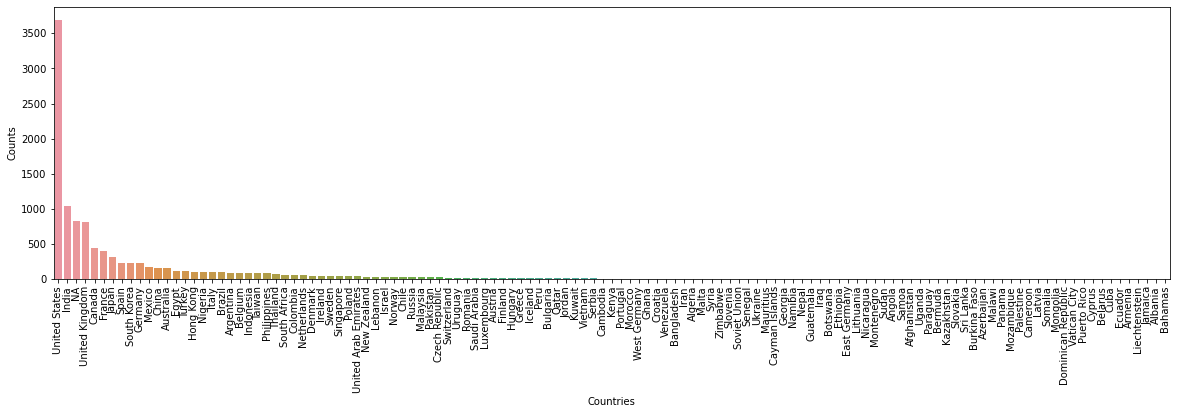

In [128]:
plt.figure(figsize=(20, 5))
sns.barplot(data=df_country, y="country_series", x="index")
plt.xlabel("Countries")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.show()

**Observation:** US is the major producer of movies/shows followed by India. A majority of the shows do not have a country assigned.
US alone produces almost half of all the shows. It is highly monopolized.

**What kind of shows have been produced over time?**

In [61]:
df_date_genre = df_exploded.loc[:, ["show_id", "type", "date_added", "listed_in_series"]].groupby(["show_id", "type", "listed_in_series", "date_added"]).count().reset_index()

In [62]:
df_date_genre["year"] = df_date_genre["date_added"].dt.year
df_date_genre["month"] = df_date_genre["date_added"].dt.month
df_date_genre["day_of_week"] = df_date_genre["date_added"].dt.dayofweek

In [63]:
df_date_genre.loc[df_date_genre["year"] == 2008]

,show_id,type,listed_in_series,date_added,year,month,day_of_week
12208,s5958,Movie,Dramas,2008-01-01,2008,1,1
12209,s5958,Movie,Independent Movies,2008-01-01,2008,1,1
12210,s5958,Movie,Thrillers,2008-01-01,2008,1,1
13777,s6612,TV Show,Stand-Up Comedy & Talk Shows,2008-02-04,2008,2,0


In [64]:
df_year_type_dedup = df_date_genre.loc[:, ["type", "year", "show_id"]].groupby(["year", "type", "show_id"]).count().reset_index()

In [65]:
df_year_type_dedup.head()

,year,type,show_id
0,2008,Movie,s5958
1,2008,TV Show,s6612
2,2009,Movie,s5956
3,2009,Movie,s5957
4,2010,Movie,s7371


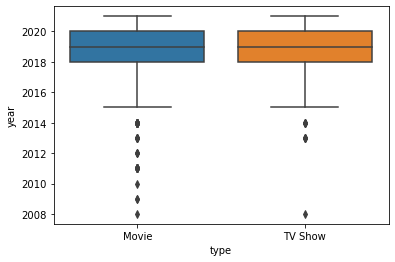

In [125]:
sns.boxplot(data=df_year_type_dedup, y="year", x="type")
plt.show()

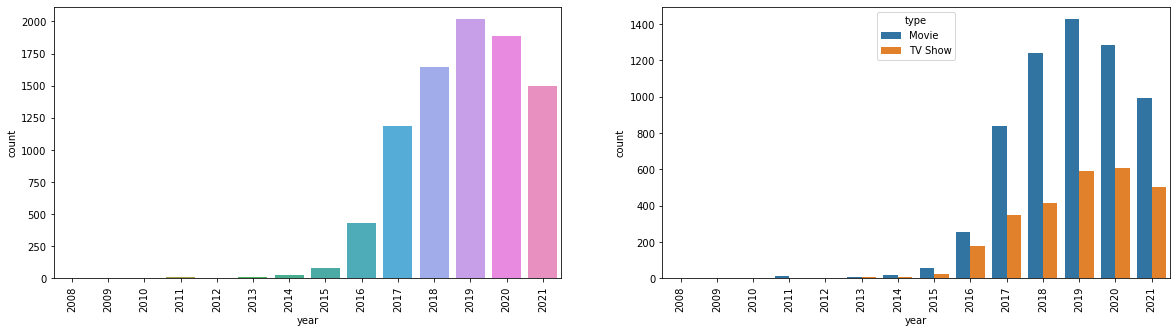

In [66]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
sns.countplot(data=df_year_type_dedup, x="year")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(data=df_year_type_dedup, x="year", hue="type")
plt.xticks(rotation=90)

plt.show()

**Observations**:
- In general, the shows getting released on Netflix are on a decline after 2019
- There are clearly lesser number of TV shows than there are movies
- The decline in movies is faster than the decline of shows
- Based on the boxplot, for both TV shows and movies, the median year to be added is 2019. Also, 50% of the data lies between 2018-2020

**What genres are most viewed?**

In [67]:
df_genre = pd.DataFrame(dedup_groupby(df_exploded, "show_id", "listed_in_series").value_counts().reset_index())

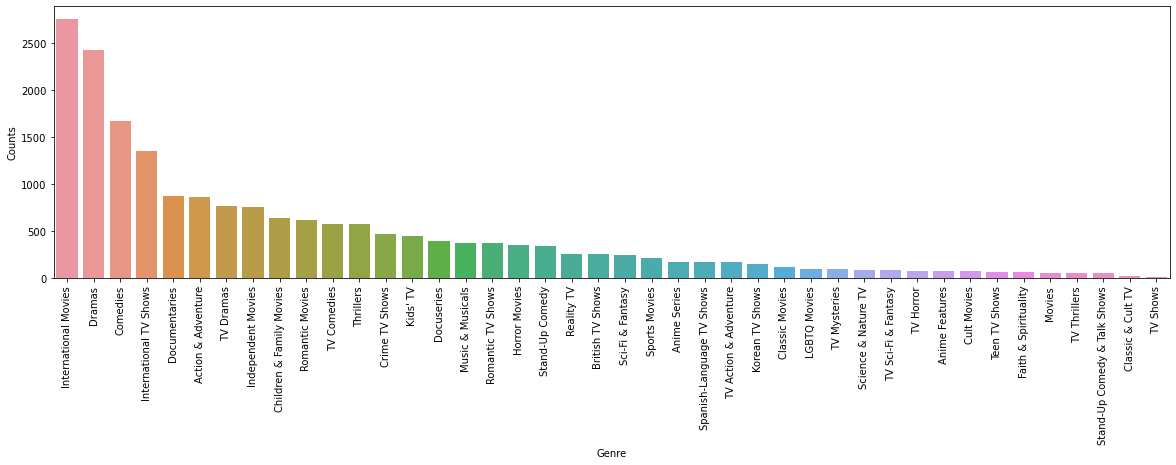

In [130]:
plt.figure(figsize=(20, 5))
sns.barplot(data=df_genre, x="index", y="listed_in_series")
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Counts")
plt.show()

**Observation**: Some genres are way more than the other ones.

**Let's see Genre vs Year, Month and Day of Week**

In [69]:
df_year_genre_counts = df_date_genre.loc[:, ["listed_in_series", "year", "show_id"]].groupby(["year", "listed_in_series"])[["show_id"]].count().reset_index()
df_month_genre_counts = df_date_genre.loc[:, ["listed_in_series", "month", "show_id"]].groupby(["month", "listed_in_series"])[["show_id"]].count().reset_index()
df_dow_genre_counts = df_date_genre.loc[:, ["listed_in_series", "day_of_week", "show_id"]].groupby(["day_of_week", "listed_in_series"])[["show_id"]].count().reset_index()

df_year_genre_counts

,year,listed_in_series,show_id
0,2008,Dramas,1
1,2008,Independent Movies,1
2,2008,Stand-Up Comedy & Talk Shows,1
3,2008,Thrillers,1
4,2009,Dramas,1
...,...,...,...
326,2021,TV Sci-Fi & Fantasy,20
327,2021,TV Shows,5
328,2021,TV Thrillers,13
329,2021,Teen TV Shows,18


In [70]:
df_year_genre_pivot = df_year_genre_counts.pivot(columns="listed_in_series", index="year", values="show_id").fillna(0)
df_month_genre_pivot = df_month_genre_counts.pivot(columns="listed_in_series", index="month", values="show_id").fillna(0)
df_dow_genre_pivot = df_dow_genre_counts.pivot(columns="listed_in_series", index="day_of_week", values="show_id").fillna(0)

In [71]:
df_year_genre_pivot

listed_in_series,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
year,,,,,,,,,,,,,,,,,,,,,
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,4.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
2014,1.0,0.0,0.0,0.0,4.0,1.0,0.0,2.0,1.0,0.0,...,0.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2015,2.0,0.0,0.0,6.0,11.0,1.0,0.0,12.0,1.0,0.0,...,2.0,8.0,8.0,2.0,2.0,2.0,0.0,1.0,0.0,2.0
2016,18.0,4.0,14.0,19.0,20.0,1.0,2.0,48.0,27.0,1.0,...,8.0,40.0,43.0,5.0,4.0,3.0,2.0,5.0,3.0,14.0


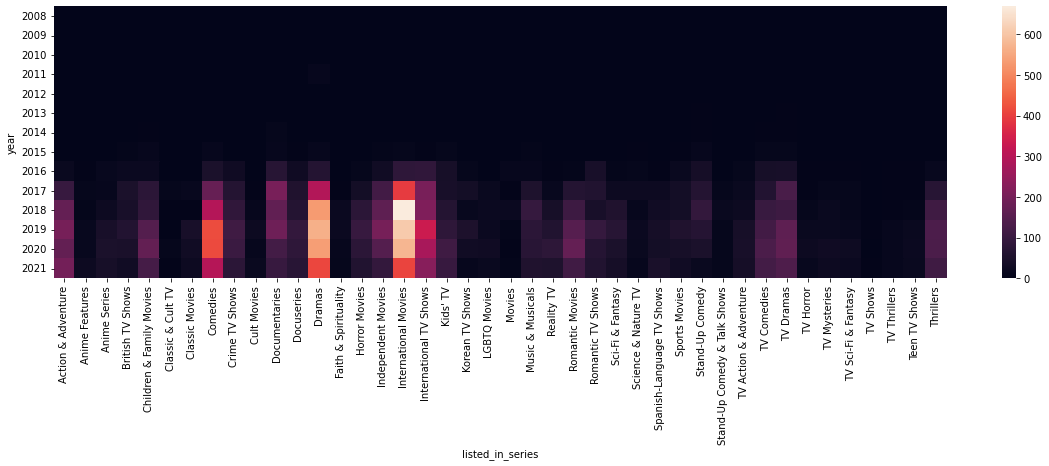

In [72]:
plt.figure(figsize=(20,5))
sns.heatmap(df_year_genre_pivot)
plt.show()

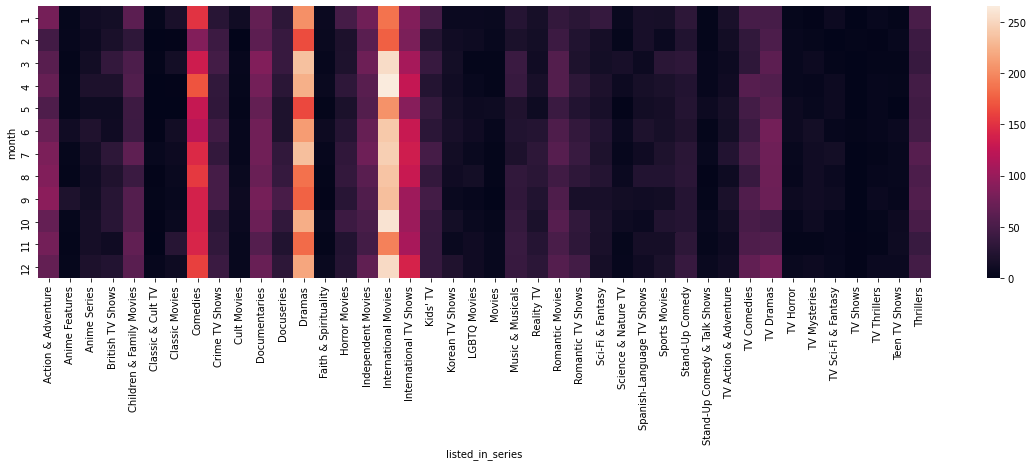

In [73]:
plt.figure(figsize=(20,5))
sns.heatmap(df_month_genre_pivot)
plt.show()

**Observations:** 
- February, May and November seem to be the months where not a lot of shows are added (based on the heatmaps for most of the genres)
- Shows are relatively added more in the months of April, October and December

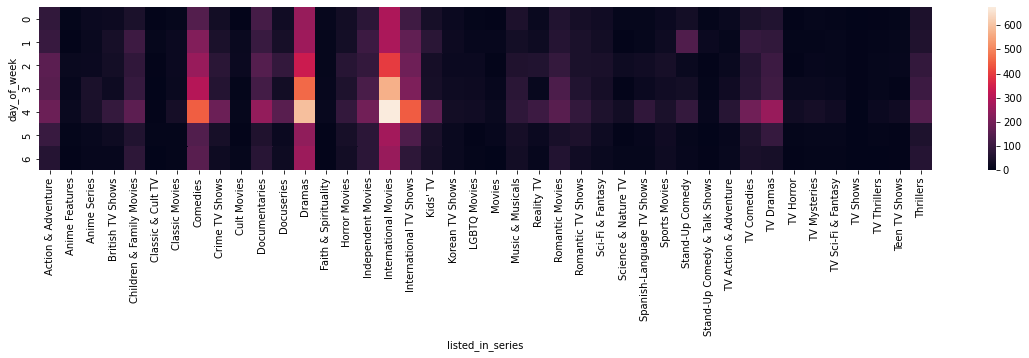

In [74]:
plt.figure(figsize=(20,3))
sns.heatmap(df_dow_genre_pivot)
plt.show()

**Observations:**
- For almost all genres, they are released most probably on Fridays, except for Stand-Up Comedy - they are most;y released on Tuesdays

**How does the genre trend look like?**

In [75]:
df_date_genre["date_month"] = df_date_genre["date_added"].dt.to_period("M")

In [76]:
df_date_genre

,show_id,type,listed_in_series,date_added,year,month,day_of_week,date_month
0,s1,Movie,Documentaries,2021-09-25,2021,9,5,2021-09
1,s10,Movie,Comedies,2021-09-24,2021,9,4,2021-09
2,s10,Movie,Dramas,2021-09-24,2021,9,4,2021-09
3,s100,TV Show,TV Comedies,2021-09-07,2021,9,1,2021-09
4,s100,TV Show,TV Dramas,2021-09-07,2021,9,1,2021-09
...,...,...,...,...,...,...,...,...
19318,s998,TV Show,British TV Shows,2021-04-22,2021,4,3,2021-04
19319,s998,TV Show,Docuseries,2021-04-22,2021,4,3,2021-04
19320,s998,TV Show,International TV Shows,2021-04-22,2021,4,3,2021-04
19321,s999,Movie,Documentaries,2021-04-22,2021,4,3,2021-04


In [77]:
df_genre_year = df_date_genre[["year", "listed_in_series", "show_id"]].groupby(["year", "listed_in_series"])["show_id"].count().reset_index()

In [78]:
df_genre_year

,year,listed_in_series,show_id
0,2008,Dramas,1
1,2008,Independent Movies,1
2,2008,Stand-Up Comedy & Talk Shows,1
3,2008,Thrillers,1
4,2009,Dramas,1
...,...,...,...
326,2021,TV Sci-Fi & Fantasy,20
327,2021,TV Shows,5
328,2021,TV Thrillers,13
329,2021,Teen TV Shows,18


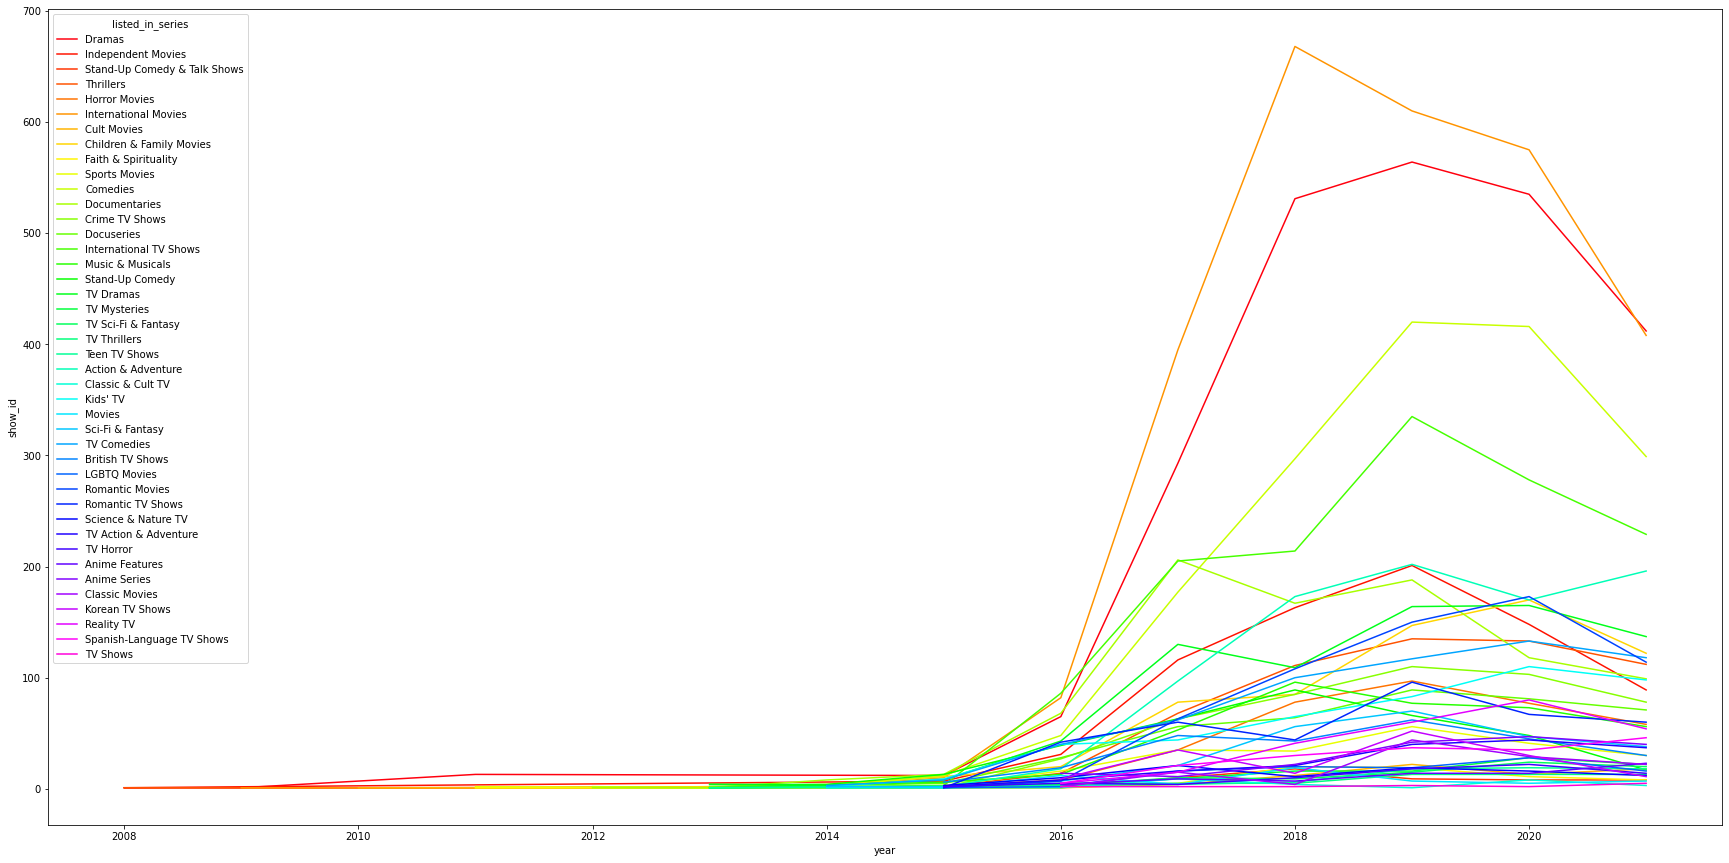

In [79]:
plt.figure(figsize=(30,15))
sns.lineplot(data=df_genre_year, x="year", y="show_id", hue="listed_in_series", palette="gist_rainbow")
plt.show()

**We do not have a lot of data before 2015. Let's see the trend after that.**

In [80]:
df_genre_year_after_2015 = df_genre_year.loc[(df_genre_year["year"] > 2015)]

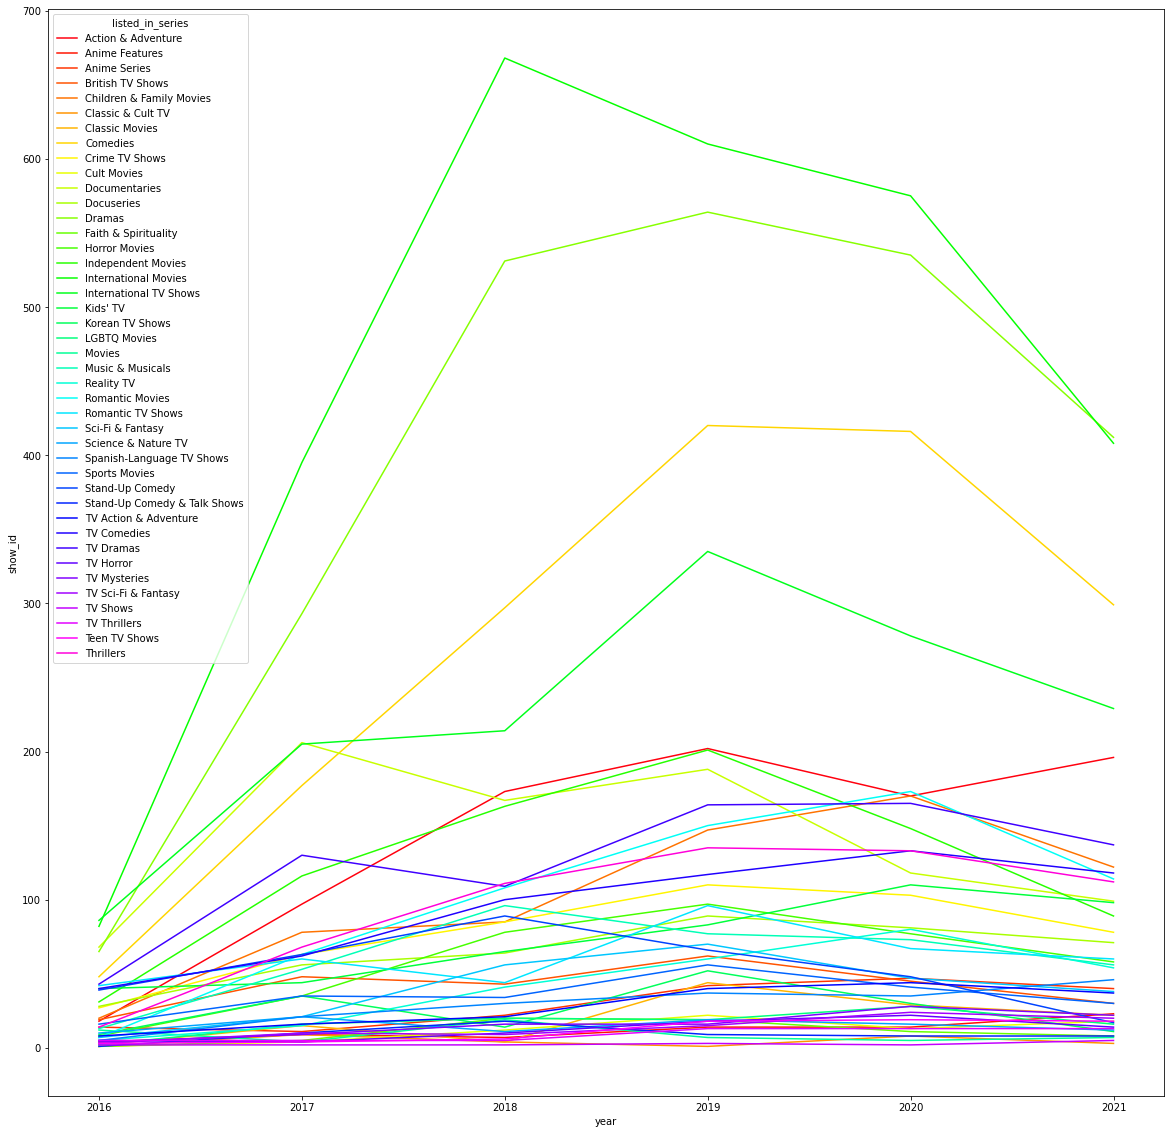

In [81]:
plt.figure(figsize=(20,20))
sns.lineplot(data=df_genre_year_after_2015, x="year", y="show_id", hue="listed_in_series", palette="gist_rainbow")
plt.show()

**A lot of the genres are hidden because of the topmost genres. Let us remove them to uncover the "not so evident" genres**

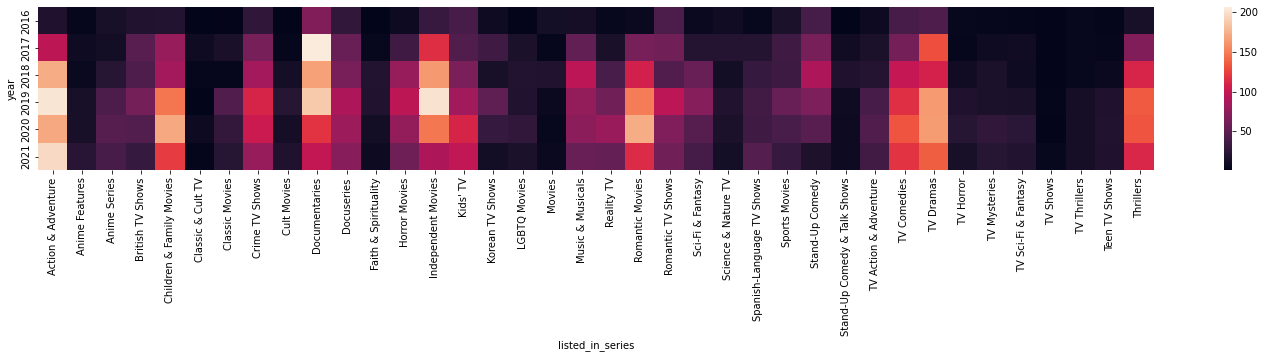

In [82]:
plt.figure(figsize=(25,3))
sns.heatmap(df_year_genre_pivot.loc[df_year_genre_pivot.index > 2015, 
                                    ~df_year_genre_pivot.columns.isin([
                                        "Comedies", "Dramas", "International Movies", "International TV Shows"
                                    ])])
plt.show()

**Observation**: Based on the trend graph and the heatmap, we can infer that most of the genres are on a declining trend except for "Action & Adventure", 'Anime Features', 'Cult Movies', 'Spanish-Language TV Shows'

In [83]:
df_genre_upwards = df_genre_year.loc[(df_genre_year["year"] > 2015) & 
                                             (df_genre_year["listed_in_series"].isin(["Action & Adventure", 'Anime Features', 'Cult Movies', 'Spanish-Language TV Shows']))]

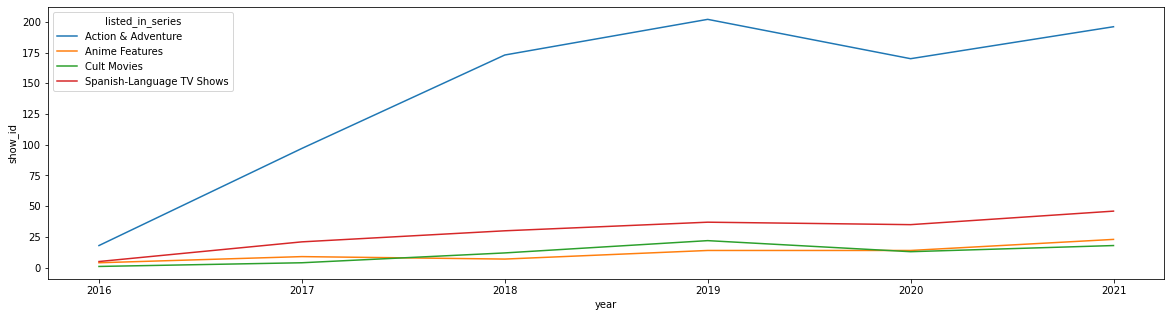

In [84]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_genre_upwards, x="year", y="show_id", hue="listed_in_series")
plt.show()

### RECOMMENDATION 1
**Netflix should start producing more movies of the genres:
'Action & Adventure', 'Anime Features', 'Cult Movies', 'Spanish-Language TV Shows'**

### Let us analyze release date vs added dates 

In [85]:
df["date_added_year"] = df["date_added"].dt.year
df_release_added_year = df.loc[:, ["show_id", "date_added_year", "release_year"]].copy()

In [86]:
release_added_year_pivot = df_release_added_year[["release_year",
                                                  "date_added_year",
                                                  "show_id"]].groupby(["release_year",
                                                                       "date_added_year"])["show_id"].count().reset_index().pivot(columns="release_year", 
                                                                                                                                  index="date_added_year",
                                                                                                                         values="show_id").fillna(0)

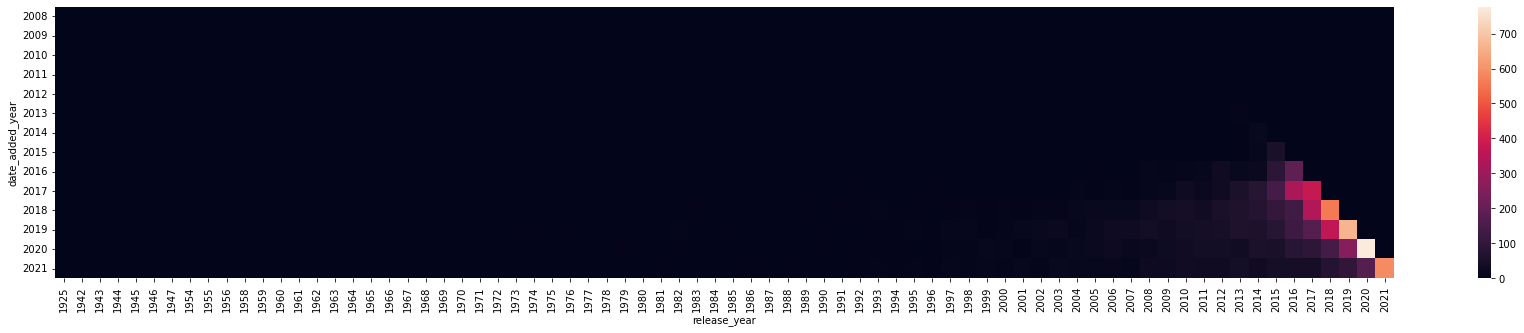

In [87]:
plt.figure(figsize=(30, 5))
sns.heatmap(release_added_year_pivot)
plt.show()

**Observation**: 
- The most number of shows added are the ones that were released the same year
- The number of shows for the previous years' are lesser - the trend continues
- The most number of shows were released in 2020 and added in 2020 itself
- Based on this heatmap, it is hard to identify the shows which were released before 2012 which also means that most of the shows in Netflix are latest in nature.

### Trends on Ratings

First, let us try to see what the ratings mean so that we can impute values as correct as possible. (Obtained from Netflix official page)

Kids: \
TV-Y: Designed to be appropriate for all children\
TV-Y7: Suitable for ages 7 and up\
\
G: Suitable for General Audiences\
TV-G: Suitable for General Audiences\
PG: Parental Guidance suggested\
TV-PG: Parental Guidance suggested\
\
Teens: \
PG-13: Parents strongly cautioned. May be Inappropriate for ages 12 and under.\
TV-14: Parents strongly cautioned. May not be suitable for ages 14 and under.\
\
Adults: \
R: Restricted. May be inappropriate for ages 17 and under.\
TV-MA: For Mature Audiences. May not be suitable for ages 17 and under.\
NC-17: Inappropriate for ages 17 and under\


In [88]:
df_year_rating = df[["show_id", "date_added_year", "rating"]].groupby(["date_added_year", "rating"])["show_id"].count().reset_index()

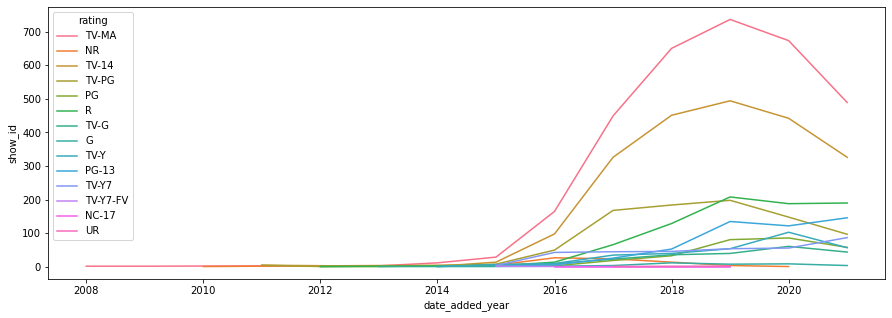

In [89]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df_year_rating, x="date_added_year", y="show_id", hue="rating")

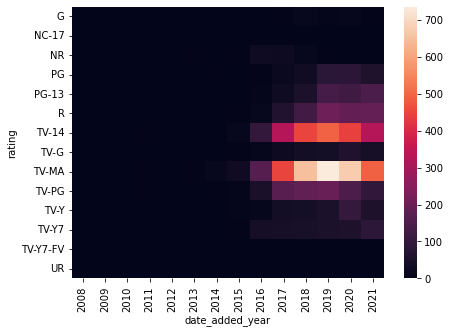

In [90]:
plt.figure(figsize=(7,5))
sns.heatmap(df_year_rating.pivot(index="rating",
                    columns="date_added_year",
                    values="show_id").fillna(0))
plt.show()

**Observations**: 
- We already know that after 2019, the additions have decreased, so it is natural to see a peak for all ratings at around 2019 and then a decline henceforth.
- But there are some ratings that have seen a rise in the past 2-3 years
    - PG-13
    - R
    - TV-Y7
- Except R, the other two are not explicit content. We can draw an inference that maybe the younger population has started taking an interest in Netflix and hence the producers are also making such content.

## RECOMMENDATION 2
**The youth seems to be attracted. Add more content of their likings**

**Let's see a distribution of duration for TV Shows and movies**

Text(0.5, 0, 'TV Shows - Seasons')

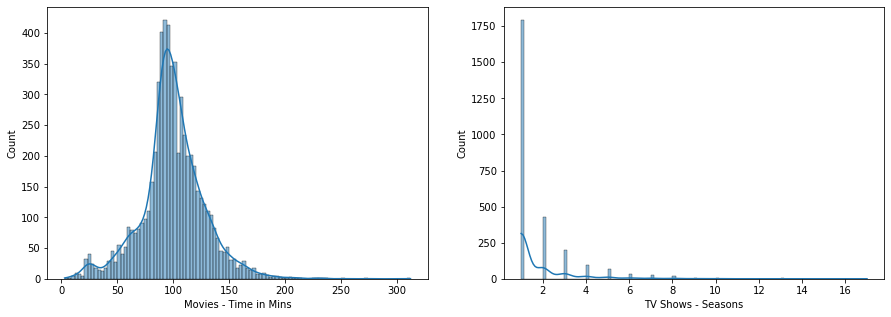

In [91]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df.loc[df["type"] == "Movie", "duration_amt"], kde=True)
plt.xlabel("Movies - Time in Mins")

plt.subplot(1, 2, 2)
sns.histplot(df.loc[df["type"] == "TV Show", "duration_amt"], kde=True)
plt.xlabel("TV Shows - Seasons")

**Observations**
- Most of the movies are around 100 mins
- There are however outliers - movies that last more than 5 hrs!

- Most of the TV Shows have just one season

### Genre vs Rating

In [95]:
genre_rating_pivot = df_exploded[["show_id", "rating", 
             "listed_in_series"]].drop_duplicates().groupby(["rating", 
                                                             "listed_in_series"])["show_id"].count().reset_index().pivot(
    index="rating",
    columns="listed_in_series",
    values="show_id").fillna(0)

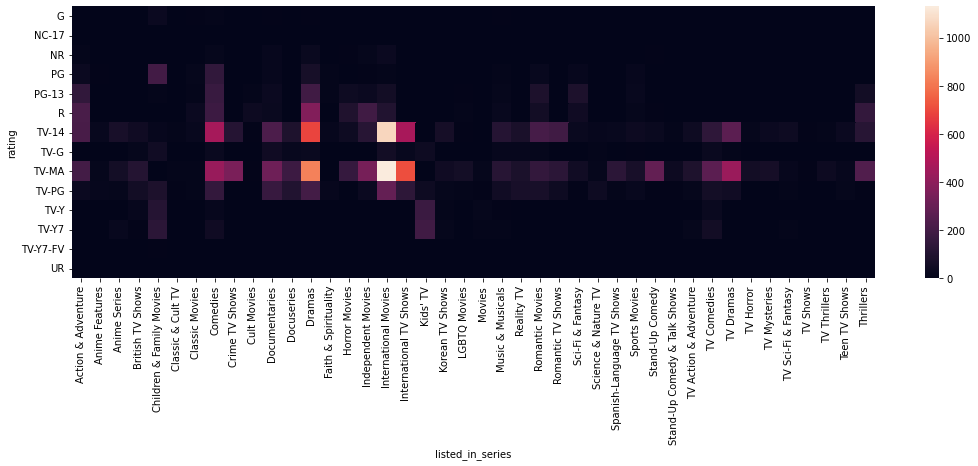

In [96]:
plt.figure(figsize=(18, 5))
sns.heatmap(genre_rating_pivot)
plt.show()

**Observations:**
- The observations are in accordance with our previous observations about genre and ratings
    - For most of the genres, TV-14 and TV-MA are the most prominent ratings
    - For children and family shows, it can be observed that they do not have their highest ratings within this range

### Directors and Cast

**Let us see the relationship between top 50 directors and genres**

In [97]:
df_director_genre = df_exploded[["show_id", "director_series", 
             "listed_in_series"]].drop_duplicates()

In [98]:
len(df_exploded["director_series"].unique())

4994

In [99]:
director_counts = df_exploded[["show_id", 
             "director_series"]].groupby(["director_series"])["show_id"].count().sort_values(ascending=False).reset_index()

In [100]:
director_counts.rename(columns={"show_id": "counts"}, inplace=True)

In [101]:
director_counts

,director_series,counts
0,Anonymous,50635
1,Martin Scorsese,419
2,Youssef Chahine,409
3,Cathy Garcia-Molina,356
4,Steven Spielberg,355
...,...,...
4989,Keith Fulton,1
4990,Doug Hamilton,1
4991,Katy Chevigny,1
4992,Drea Cooper,1


In [102]:
directors_top_50 = director_counts.loc[(director_counts["director_series"] != "Anonymous"), "director_series"].head(50)

In [103]:
director_genre_pivot = df_director_genre.loc[df_director_genre[
    "director_series"].isin(directors_top_50)].groupby(["director_series",
                                                        "listed_in_series"])["show_id"].count().reset_index().pivot(columns="director_series",
                                                                                   index="listed_in_series", values="show_id").fillna(0)

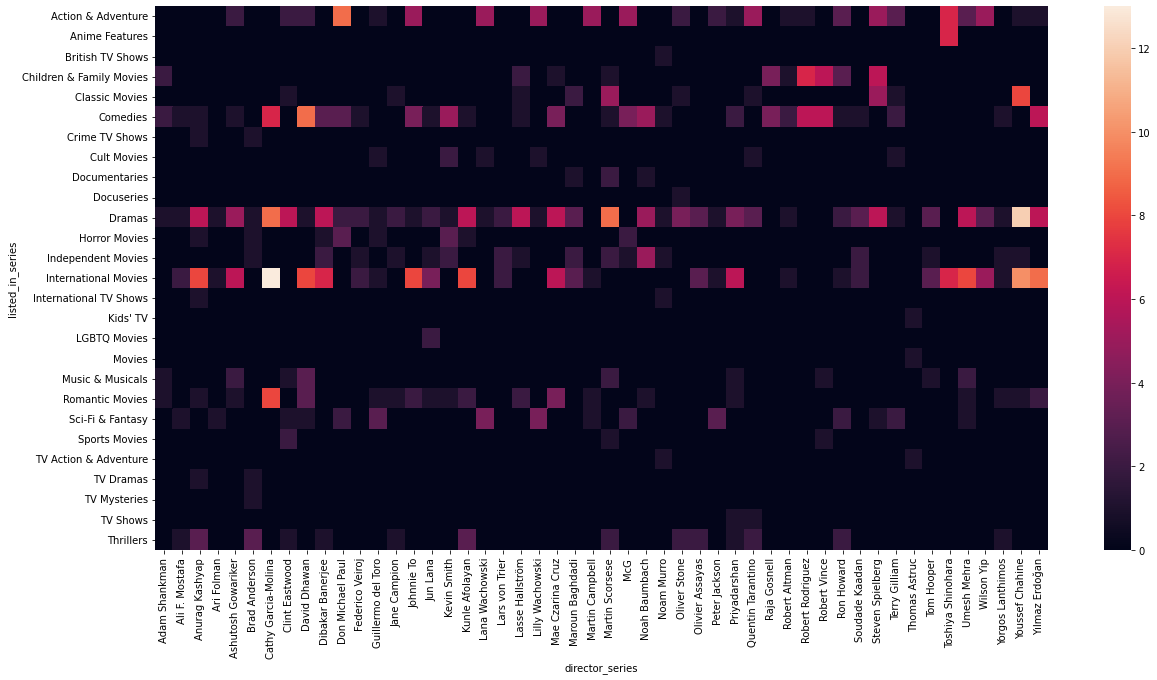

In [104]:
plt.figure(figsize=(20, 10))
sns.heatmap(director_genre_pivot)
plt.show()

**Observations**
- For the top 50 most frequent directors, their favorite genres are - 'Action & Adventure', 'Comedies', 'Dramas', 'International Movies'
- Some directors are versatile (which create a variety of shows) - e.g., 'Cathy Garcia', 'Martin Scorsese'

**Let us see the relationship between top 50 cast and genres**

In [105]:
df_cast_genre = df_exploded[["show_id", "cast_series", 
             "listed_in_series"]].drop_duplicates()

In [106]:
len(df_exploded["cast_series"].unique())

36440

In [107]:
cast_counts = df_exploded[["show_id", 
             "cast_series"]].groupby(["cast_series"])["show_id"].count().sort_values(ascending=False).reset_index()

In [108]:
cast_counts.rename(columns={"show_id": "counts"}, inplace=True)

In [109]:
cast_counts

,cast_series,counts
0,NA,2146
1,Liam Neeson,161
2,Alfred Molina,160
3,John Krasinski,139
4,Salma Hayek,130
...,...,...
36435,"Turabi ""Turbo"" Çamkıran",1
36436,Paul McCrane,1
36437,Jackie Kashian,1
36438,Nell Carter,1


In [110]:
cast_top_50 = cast_counts.loc[(cast_counts["cast_series"] != "NA"), "cast_series"].head(50)

In [111]:
cast_genre_pivot = df_cast_genre.loc[df_cast_genre[
    "cast_series"].isin(cast_top_50)].groupby(["cast_series",
                                                        "listed_in_series"])["show_id"].count().reset_index().pivot(columns="cast_series",
                                                                                   index="listed_in_series", values="show_id").fillna(0)

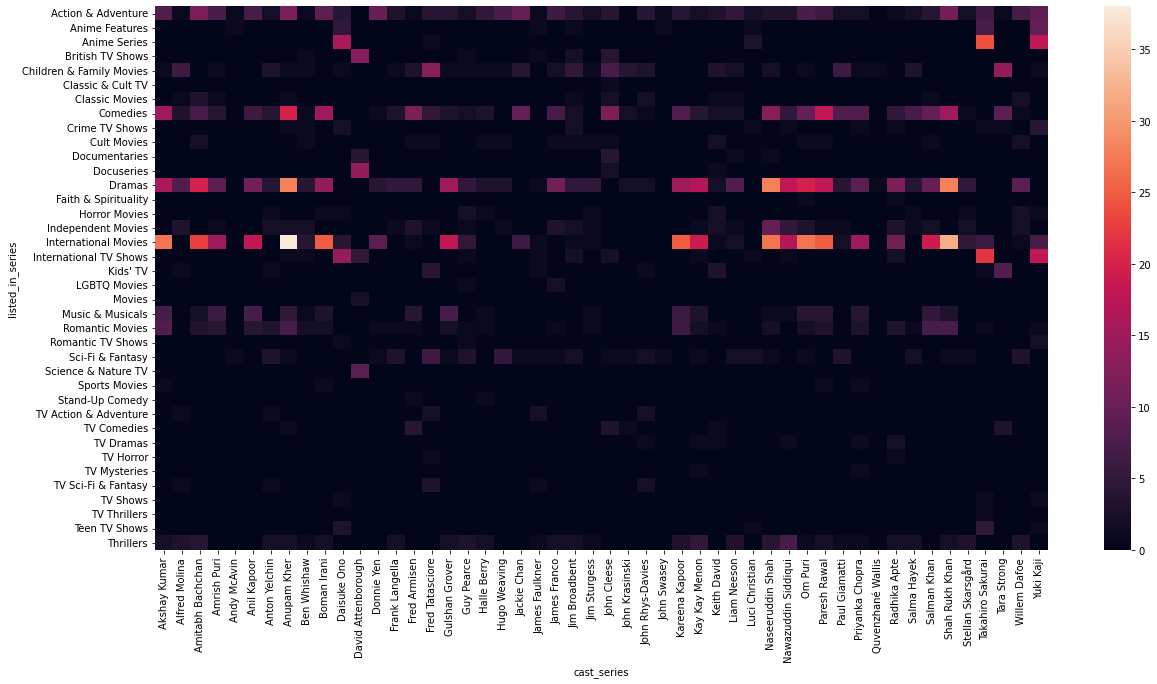

In [112]:
plt.figure(figsize=(20, 10))
sns.heatmap(cast_genre_pivot)
plt.show()

**Observations**
- For the top 50 most frequent cast, their favorite genres are - 'Action & Adventure', 'Comedies', 'Dramas', 'International Movies'
- Most of the actors are quite versatile but some are very specific (e.g, 'David Attenborough')